# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [1]:
## 라이브러리 불러오기

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

kaggle competitions download -c titanic

unzip titanic.zip -d titanic

In [2]:
## 타이타닉 데이터 가져오기 

titanic_df = pd.read_csv("./titanic/train.csv")


## 1. 분석의 목적과 변수 확인

In [3]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [5]:
## 데이터 전체 정보를 얻는 함수 : .describe()

titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
## 상관계수 확인!

titanic_df.corr()

#상관성 : Aup, Bup
#인과성 : A -> B

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
### 결측치 확인 안에 null 있는 갯수

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

### 1. Survied Column

In [8]:
## 생존자, 사망자 명수 

print("sum : ",titanic_df['Survived'].sum())
print("count : ",titanic_df['Survived'].value_counts())

sum :  342
count :  0    549
1    342
Name: Survived, dtype: int64


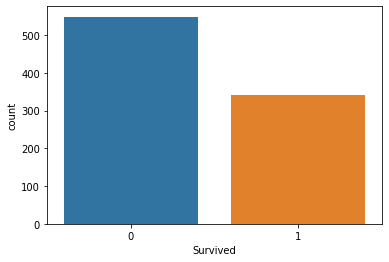

In [9]:
## 생존자수와 사망자수를 Barplot으로 그려보기 sns.countplot()

sns.countplot(x='Survived', data=titanic_df)
plt.show()

### 2.Pclass

In [10]:
# Pclass에 따른 인원 파악   
titanic_df[['Pclass','Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [11]:
# 생존자 인원

titanic_df[['Pclass','Survived']].groupby(['Pclass']).sum()


,Survived
Pclass,
1,136
2,87
3,119


In [12]:
# 생존자 비율

titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


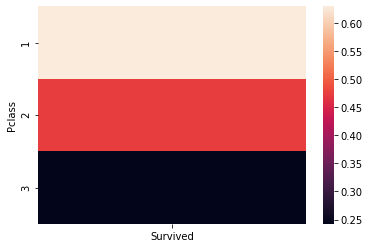

In [13]:
# 히트맵 활용
sns.heatmap(titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean())
plt.show()

### 3.Sex

In [14]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

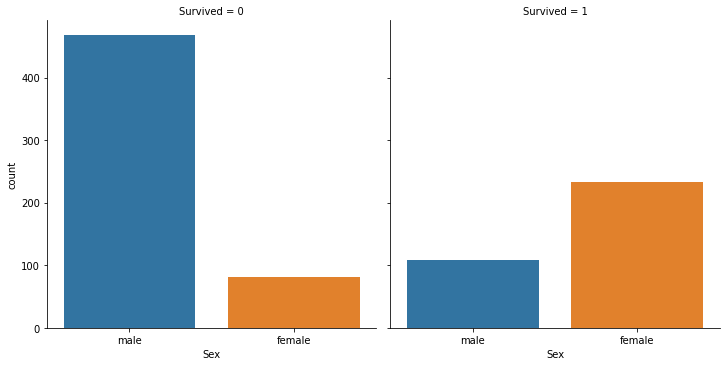

In [15]:
# sns.catplot

sns.catplot(x='Sex', col='Survived', kind='count', data=titanic_df)
plt.show()

### 4. Age

In [16]:
## 결측치 존재 조심

### 데이터의 그룹했을때 결과들을 볼수있다
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

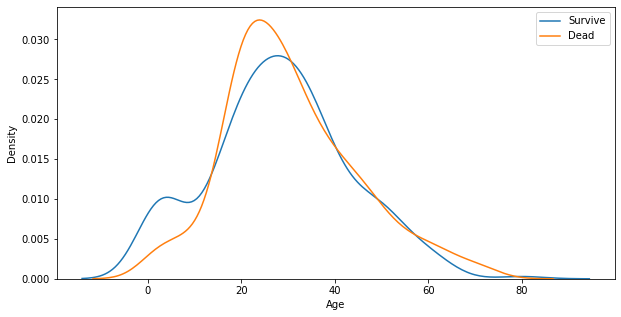

In [17]:
## Survived 1, 0 과 Age의 경향성
# figure 도면 => axit x축 y축 틀 => plot 값
# kdeplot 밀도함수

### plt.subplot (가로 몇개, 세로몇개# Survived 1, 0 과 Age의 경향성
# # figure 도면 => axit x축 y축 틀 => plot 값
# kdeplot 커널 밀도함수

### plt.subplot (가로 몇개, 세로몇개, 도면크기(가로, 세로) )
# 여기 fig 는 안씀 사이즈 알려주는거 같은데 
fig, ax =plt.subplots(1,1, figsize=(10, 5))

sns.kdeplot(x = titanic_df[titanic_df.Survived == 1]['Age'], ax=ax)
sns.kdeplot(x = titanic_df[titanic_df.Survived == 0]['Age'], ax=ax)

plt.legend(['Survive', 'Dead'])

plt.show()

### Appendix 1. Sex + Pclass vs Survived

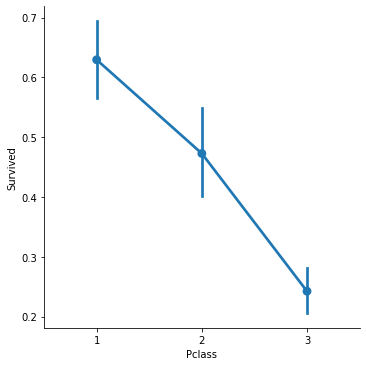

In [18]:
## 티켓의 등급에 따른 생존률을 보여준다
## 저기 짝대기는 다른 속성에따른 오차범위? 같은거 같다
sns.catplot(x='Pclass', y='Survived',  kind='point', data=titanic_df)

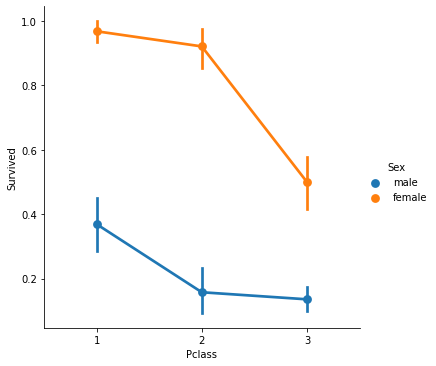

In [19]:
## hue 속성을 하나더 추가해서 상관관계보는것

sns.catplot(x='Pclass', y='Survived', hue='Sex',  kind='point', data=titanic_df)

### Appendix 2.Age + Pclass

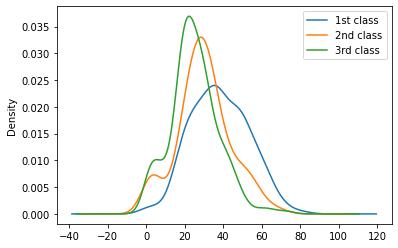

In [20]:
## Age graph with Pclass
titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')

plt.legend(['1st class','2nd class','3rd class'])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?



In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [22]:
titanic_df =  pd.read_csv("./titanic/train.csv")
titanic_df.head(5)
titanic_df['Cabin'].count()

204

In [23]:
titanic_df['CabinTF'] = titanic_df['Cabin'].notnull()

In [24]:
titanic_df.groupby(['CabinTF','Survived'])['Survived'].count()

CabinTF  Survived
False    0           481
         1           206
True     0            68
         1           136
Name: Survived, dtype: int64

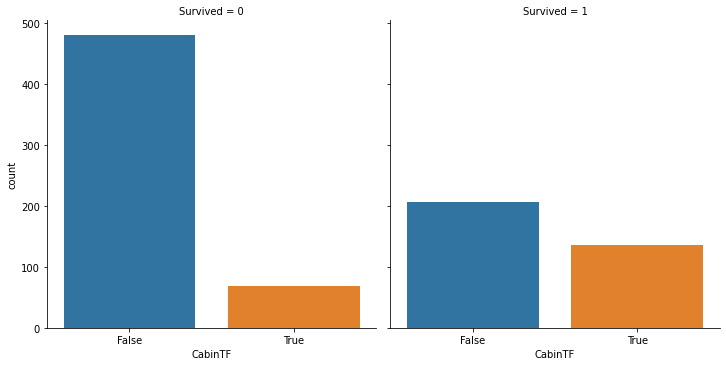

In [25]:
sns.catplot(x='CabinTF', col='Survived', kind='count', data=titanic_df)
plt.show()

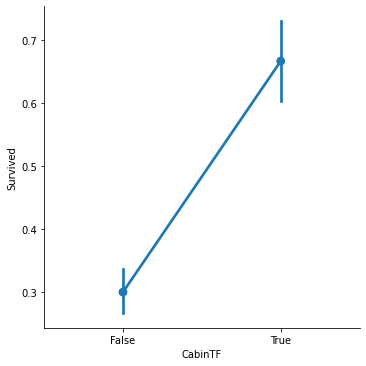

In [26]:

sns.catplot(x='CabinTF', y='Survived', kind='point', data=titanic_df)

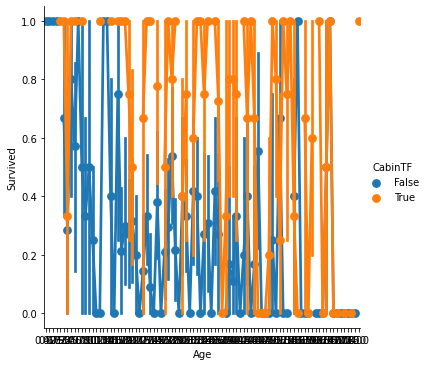

In [27]:

sns.catplot(x='Age', y='Survived', hue='CabinTF',  kind='point', data=titanic_df)

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

[와인 데이터](https://www.kaggle.com/aminbamavadat/winereviewscsv)

kaggle datasets download -d aminbamavadat/winereviewscsv

mkdir winedata 

unzip winereviewscsv.zip -d winedata/ 


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [29]:
wine_df = pd.read_csv('./winedata/winemag-data_first150k.csv')


In [30]:
wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


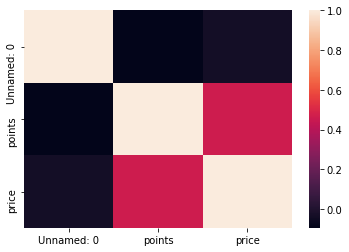

In [31]:
sns.heatmap(wine_df.corr())
plt.show()

### 음 유의미한 데이터 3개 무엇으로 할것이냐

 1. 가격과 지역 그리고 점수

 2. 품종과 점수 비율

 3. 무명와인(지역소비와인) 와인점수 와 가격



## 1. 가격과 지역 그리고 점수


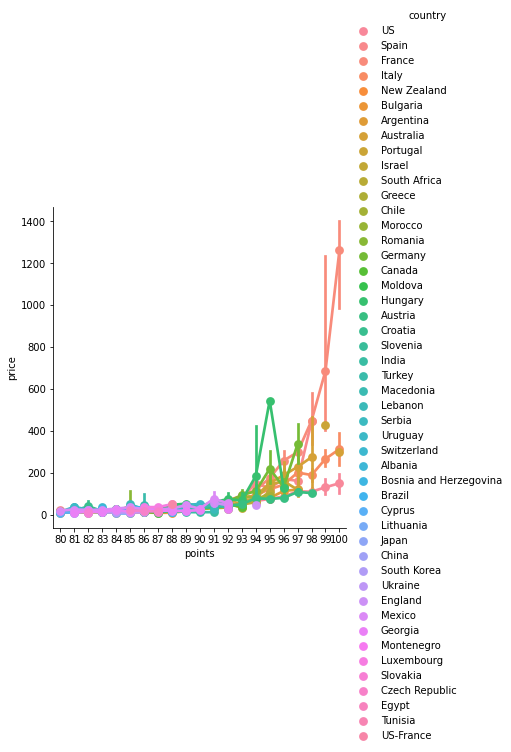

In [33]:
sns.catplot(x='points', y='price', hue='country', kind='point', data=wine_df)

## 2. 품종과 점수

2-1 데이터 카운트를 통한 품종별 점수 갯수 구하기


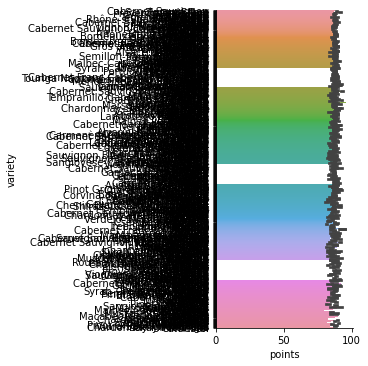

In [34]:
sns.catplot(x='points', y='variety', kind='bar', data=wine_df)

In [35]:
variety_df= wine_df['variety'].value_counts()
variety_df = variety_df[variety_df > 1000]
variety_df.reset_index()['index']

0                        Chardonnay
1                        Pinot Noir
2                Cabernet Sauvignon
3                         Red Blend
4          Bordeaux-style Red Blend
5                   Sauvignon Blanc
6                             Syrah
7                          Riesling
8                            Merlot
9                         Zinfandel
10                       Sangiovese
11                           Malbec
12                      White Blend
13                             Rosé
14                      Tempranillo
15                         Nebbiolo
16                   Portuguese Red
17                  Sparkling Blend
18                           Shiraz
19    Corvina, Rondinella, Molinara
20            Rhône-style Red Blend
21                       Pinot Gris
22                          Barbera
23                   Cabernet Franc
24                Sangiovese Grosso
25                     Pinot Grigio
26                         Viognier
27       Bordeaux-style Whit

In [36]:
winevar_df=wine_df[wine_df.variety.isin(variety_df.reset_index()['index'])]

In [37]:
 winevarietypoints_df = winevar_df[['variety','points']].value_counts().reset_index().sort_values(by = ['variety','points']).reset_index().drop(['index'], axis=1)

In [38]:
winevarietypoints_df['relative'] = (winevarietypoints_df[0]/winevarietypoints_df.groupby(['variety']).sum().loc[winevarietypoints_df.variety[0]][0])**0.25
winevarietypoints_df

,variety,points,0,relative
0,Barbera,80,3,0.216520
1,Barbera,81,15,0.323772
2,Barbera,82,26,0.371501
3,Barbera,83,24,0.364141
4,Barbera,84,55,0.448030
...,...,...,...,...
560,Zinfandel,92,181,0.603443
561,Zinfandel,93,86,0.501004
562,Zinfandel,94,47,0.430766
563,Zinfandel,95,22,0.356305


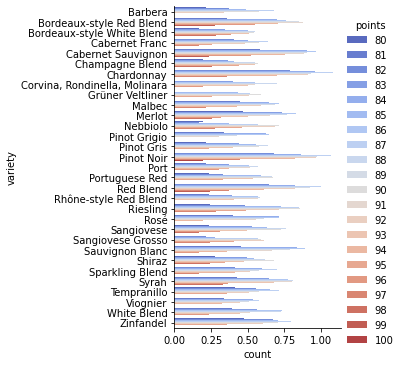

In [39]:
sns.catplot(x='relative', y="variety", hue="points", kind="bar", data=winevarietypoints_df, palette='coolwarm')
plt.xlabel('count')
plt.show()

### 3. 무명와인(지역소비와인) 와인점수 와 가격

In [40]:
nanwine_df=wine_df[wine_df['designation'].isnull()]

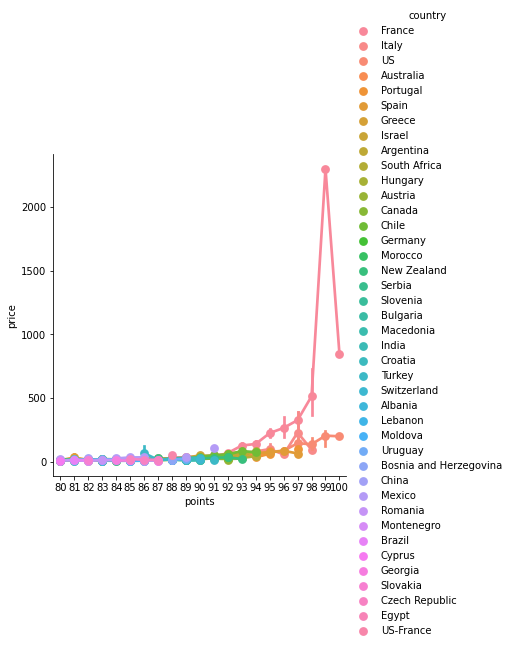

In [41]:
#무명와인(지역소비와인) 와인점수 와 가격
sns.catplot(x='points', y='price', hue='country', kind='point', data=nanwine_df)